In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("HR_comma_sep.csv")

# Descripción de las Columnas del Conjunto de Datos

Este conjunto de datos contiene información sobre empleados y diversas métricas que podrían influir en su satisfacción laboral y decisiones de retención. A continuación, se explica cada columna en detalle:

- **satisfaction_level**: Este valor representa el nivel de satisfacción del empleado en una escala de 0 a 1, donde 0 indica muy baja satisfacción y 1 representa la máxima satisfacción.

- **last_evaluation**: Puntaje de la última evaluación de desempeño del empleado, en una escala de 0 a 1. Un valor más alto indica un mejor desempeño en la evaluación.

- **number_project**: Cantidad de proyectos en los que el empleado ha trabajado. Este valor es un número entero y puede reflejar el nivel de carga de trabajo del empleado.

- **average_montly_hours**: Número promedio de horas que el empleado trabaja al mes. Esta métrica permite analizar la cantidad de horas dedicadas al trabajo por cada empleado.

- **time_spend_company**: Número de años que el empleado ha estado trabajando en la empresa. Este valor puede ser útil para comprender la relación entre la antigüedad y otros factores, como la satisfacción y la decisión de dejar la empresa.

- **Work_accident**: Indica si el empleado ha tenido algún accidente laboral. Es una variable binaria, donde 1 significa que tuvo un accidente y 0 que no lo tuvo.

- **left**: Variable binaria que indica si el empleado dejó la empresa (1) o si sigue trabajando en ella (0). Esta columna se puede utilizar como la variable objetivo en un análisis de retención de empleados.

- **promotion_last_5years**: Indica si el empleado ha recibido una promoción en los últimos 5 años. Es una variable binaria, donde 1 significa que ha recibido una promoción y 0 que no la ha recibido.

- **Department**: Área o departamento en el que trabaja el empleado (por ejemplo, "ventas", "tecnología", "finanzas"). Esta columna contiene datos categóricos y puede ser útil para entender si ciertos departamentos tienen mayores tasas de retención o satisfacción.

- **salary**: Nivel salarial del empleado, categorizado como "low

# ¿Qué es la Regresión Logística?

La **regresión logística** es un modelo estadístico utilizado para problemas de clasificación binaria, en los que se predice la probabilidad de que una observación pertenezca a una de dos clases. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística predice valores en un rango de probabilidad entre 0 y 1.

## Función Sigmoide

La regresión logística utiliza la **función sigmoide** (o logística) para transformar una combinación lineal de variables en una probabilidad. La función sigmoide se define como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

donde \( z \) es una combinación lineal de los parámetros y las variables independientes:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Aquí,  $ \beta_0 \ $ es el intercepto, $ \beta_1, \beta_2, \dots, \beta_n $ son los coeficientes de las variables independientes $ x_1, x_2, \dots, x_n $.

## Interpretación de la Probabilidad

La salida de la función sigmoide, $ \sigma(z) $, representa la probabilidad de que la observación pertenezca a la clase positiva (por ejemplo, $ y = 1 $). Esto se expresa como:

$$
P(y = 1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

Para clasificar, usamos un umbral de 0.5: si $ P(y = 1 | x) \geq 0.5 $, entonces se clasifica en la clase positiva; de lo contrario, se clasifica en la clase negativa.

## Función de Costo (Log Loss)

Para entrenar el modelo, la regresión logística minimiza una **función de pérdida logarítmica** (Log Loss), que penaliza las predicciones incorrectas. La función de costo para una observación es:

$$
\text{Log Loss} = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

donde:
- $ y $ es el valor real (0 o 1),
- $ \hat{y} $ es la probabilidad predicha de que $ y = 1 $.

## Aplicaciones de la Regresión Logística

La regresión logística es ampliamente utilizada en tareas de clasificación como:
- Diagnóstico de enfermedades,
- Detección de fraudes,
- Predicción de abandono de clientes.

**Resumen**: La regresión logística convierte una combinación lineal de variables en una probabilidad usando la función sigmoide, lo cual permite resolver problemas de clasificación binaria.


<img src="logistic.png" alt="Regresión L" width="500" />

In [2]:
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [3]:
# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

In [4]:
# Tabla cruzada entre las columnas 'salary' y 'left'
salary_left_crosstab = pd.crosstab(df['salary'], df['left'])

print(salary_left_crosstab)


left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


In [7]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [16]:
pd.crosstab(df.satisfaction_level,df.left)

left,0,1
satisfaction_level,,
0.09,0,195
0.10,0,358
0.11,0,335
0.12,26,4
0.13,51,3
...,...,...
0.96,203,0
0.97,176,0
0.98,183,0


## Filtramos nuestro dataframe por las columnas de nuestro interes que podrian influenciar en la retencion de los empleados

In [8]:
df_filtrado_columnas_interes = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_filtrado_columnas_interes.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# ¿Por qué necesitamos convertir variables categóricas en variables dummy?

En el análisis de datos y machine learning, es común encontrar variables categóricas, que representan categorías o etiquetas sin un orden numérico. Sin embargo, muchos modelos de machine learning no pueden procesar estas variables directamente, ya que funcionan con datos numéricos. Por lo tanto, es necesario convertir estas categorías en una representación numérica adecuada. Un método muy utilizado es el de **variables dummy**.

## ¿Qué son las variables dummy?

Las **variables dummy** son variables binarias (0 o 1) que representan la presencia o ausencia de una categoría específica dentro de una variable categórica. Por ejemplo, si tenemos una variable de "salary" con tres categorías ("low", "medium", "high"), las variables dummy correspondientes serían:

| Salary  | low | medium | high |
|---------|------|-------|------|
| low    | True    | False     | False    |
| medium   | False    | True    | False    |
| high    | False    | False     | True   |

Cada fila muestra cuál de las categorías está presente para esa observación.

## ¿Por qué convertir a variables dummy?

### 1. Requerimiento para los Modelos

La mayoría de los algoritmos de machine learning, como regresión lineal, regresión logística y árboles de decisión, necesitan que las variables de entrada sean numéricas. Las variables categóricas, al ser texto o etiquetas, no pueden ser directamente interpretadas por estos modelos. Convertirlas en dummies permite que el modelo las procese correctamente.


In [9]:

variable_salary_dummies = pd.get_dummies(df_filtrado_columnas_interes.salary, prefix="salary")

In [12]:
df_final_con_dummies = pd.concat([df_filtrado_columnas_interes,variable_salary_dummies],axis='columns')

In [13]:
df_final_con_dummies.drop('salary',axis='columns',inplace=True)
df_final_con_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [14]:
X = df_final_con_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


### Variable independiente 

- **left**: Variable binaria que indica si el empleado dejó la empresa (1) o si sigue trabajando en ella (0). Esta columna se puede utilizar como la variable objetivo en un análisis de retención de empleados.

In [15]:
y = df.left

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

<img src="tf.png" alt="Regresión L" width="500" />

### Podemos evaluar el rendimiento de nuestro modelo con confusion_matrix

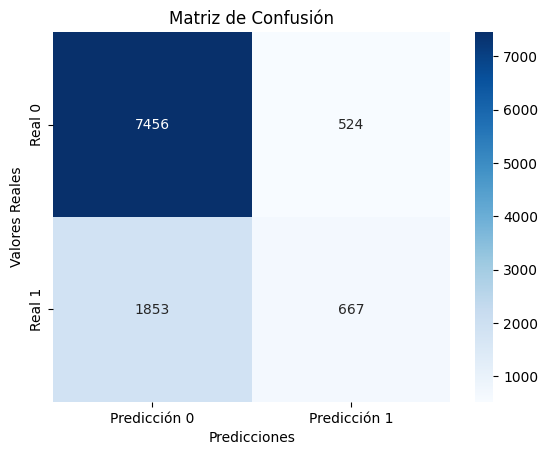

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

Referencias  

https://www.youtube.com/watch?v=EKm0spFxFG4&t=50s

https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/Exercise/7_logistic_regression_exercise.ipynb

https://www.kaggle.com/datasets/giripujar/hr-analytics/data